In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report, precision_score, confusion_matrix

In [4]:
df = pd.read_csv('mental_health.csv')

In [5]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df['label'].value_counts()

label
0    14139
1    13838
Name: count, dtype: int64

In [9]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df[['text', 'word_count']].head()

,text,word_count
0,dear american teens question dutch person hear...,23
1,nothing look forward lifei dont many reasons k...,20
2,music recommendations im looking expand playli...,64
3,im done trying feel betterthe reason im still ...,100
4,worried year old girl subject domestic physic...,311


In [10]:
df['word_count'].shape

(27977,)

In [11]:
df[df['word_count'] > 250].shape

(1331, 3)

In [12]:
df.describe()

,label,word_count
count,27977.000000,27977.000000
mean,0.494621,71.759410
std,0.499980,103.802417
min,0.000000,0.000000
25%,0.000000,16.000000
50%,0.000000,38.000000
75%,1.000000,87.000000
max,1.000000,2676.000000


In [15]:
X = df['text']
y = df["label"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
y_train.value_counts()

label
0    11311
1    11070
Name: count, dtype: int64

In [20]:
y_test.value_counts()

label
0    2828
1    2768
Name: count, dtype: int64

In [21]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [22]:
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)
lr_pred = model.predict(X_test_tfidf)

In [ ]:
lr_f1 = f1_score(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)

print(f"f1_score: {lr_f1:.4f}")
print(f"accuracy_score: {lr_accuracy:.4f}")
print(f"recall_score: {lr_recall:.4f}")
print(f"precision_score: {lr_precision:.4f}")
print(f"roc_auc_score: {lr_roc_auc:.4f}")


f1_score: 0.9132
accuracy_score: 0.9148
recall_score: 0.9061
precision_score: 0.9204
roc_auc_score: 0.9147


In [24]:
print("Повний звіт:\n", classification_report(y_test, lr_pred))

Повний звіт:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      2828
           1       0.92      0.91      0.91      2768

    accuracy                           0.91      5596
   macro avg       0.91      0.91      0.91      5596
weighted avg       0.91      0.91      0.91      5596



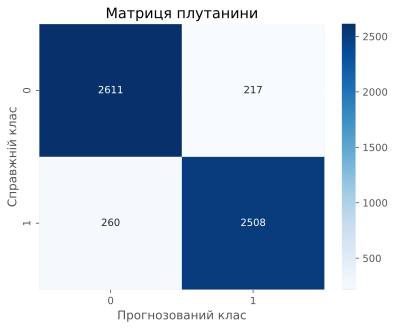

In [25]:
cm = confusion_matrix(y_test, lr_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()

In [26]:
lsvc = LinearSVC()
lsvc.fit(X_train_tfidf, y_train)
lsvc_pred = lsvc.predict(X_test_tfidf)

In [27]:
lsvc_f1 = f1_score(y_test, lsvc_pred)
lsvc_accuracy = accuracy_score(y_test, lsvc_pred)
lsvc_recall = recall_score(y_test, lsvc_pred)
lsvc_roc_auc = roc_auc_score(y_test, lsvc_pred)
lsvc_precision = precision_score(y_test, lsvc_pred)

print(f"f1_score: {lsvc_f1:.4f}")
print(f"accuracy_score: {lsvc_accuracy:.4f}")
print(f"recall_score: {lsvc_recall:.4f}")
print(f"precision_score: {lsvc_precision:.4f}")
print(f"roc_auc_score: {lsvc_roc_auc:.4f}")

f1_score: 0.9083
accuracy_score: 0.9099
recall_score: 0.9017
precision_score: 0.9150
roc_auc_score: 0.9098


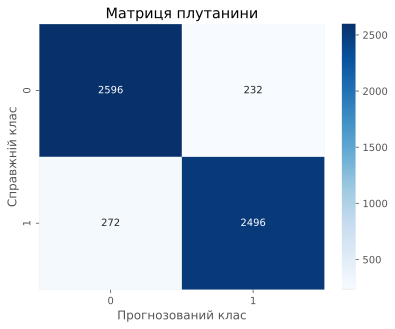

In [28]:
cm = confusion_matrix(y_test, lsvc_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()

In [32]:
rfc = RandomForestClassifier(random_state=42).fit(X_train_tfidf, y_train)
rfc_pred = rfc.predict(X_test_tfidf)

In [33]:
print(f"f1_score: {f1_score(y_test, rfc_pred):.4f}")
print(f"accuracy_score: {accuracy_score(y_test, rfc_pred):.4f}")
print(f"recall_score: {recall_score(y_test, rfc_pred):.4f}")
print(f"precision_score: {precision_score(y_test, rfc_pred):.4f}")
print(f"roc_auc_score: {roc_auc_score(y_test, rfc_pred):.4f}")

f1_score: 0.8867
accuracy_score: 0.8867
recall_score: 0.8960
precision_score: 0.8776
roc_auc_score: 0.8868


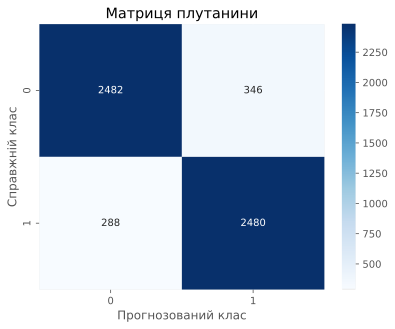

In [34]:
cm = confusion_matrix(y_test, rfc_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()

In [38]:
lgbm = LGBMClassifier(verbose=-1).fit(X_train_tfidf, y_train)
lgbm_pred = lgbm.predict(X_test_tfidf)

In [39]:
print(f"f1_score: {f1_score(y_test, lgbm_pred):.4f}")
print(f"accuracy_score: {accuracy_score(y_test, lgbm_pred):.4f}")
print(f"recall_score: {recall_score(y_test, lgbm_pred):.4f}")
print(f"precision_score: {precision_score(y_test, lgbm_pred):.4f}")
print(f"roc_auc_score: {roc_auc_score(y_test, lgbm_pred):.4f}")

f1_score: 0.9004
accuracy_score: 0.9023
recall_score: 0.8934
precision_score: 0.9075
roc_auc_score: 0.9022


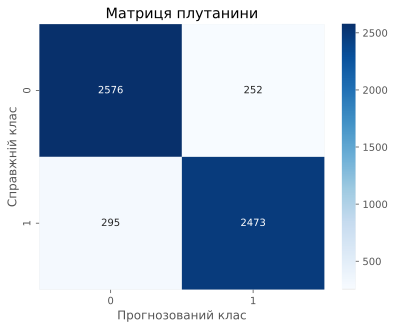

In [40]:
cm = confusion_matrix(y_test, lgbm_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

In [ ]:
max_words = 20000
max_len = 150

In [49]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

X_train_rnn = pad_sequences(X_train_token, maxlen=max_len, padding='post', truncating='post')
X_test_rnn = pad_sequences(X_test_token, maxlen=max_len, padding='post', truncating='post')

y_train_rnn = np.array(y_train)
y_test_rnn = np.array(y_test)

In [57]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [58]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model.fit(
    X_train_rnn, y_train_rnn,
    validation_data=(X_test_rnn, y_test_rnn),
    epochs=4,
    batch_size=64,
    verbose=1
)

Epoch 1/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 167s 463ms/step - accuracy: 0.5742 - loss: 0.6720 - val_accuracy: 0.6058 - val_loss: 0.6478
Epoch 2/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 102s 292ms/step - accuracy: 0.7998 - loss: 0.4582 - val_accuracy: 0.9083 - val_loss: 0.2417
Epoch 3/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 99s 284ms/step - accuracy: 0.9327 - loss: 0.1907 - val_accuracy: 0.9205 - val_loss: 0.2101
Epoch 4/4
350/350 ━━━━━━━━━━━━━━━━━━━━ 68s 195ms/step - accuracy: 0.9558 - loss: 0.1357 - val_accuracy: 0.9217 - val_loss: 0.2194


In [61]:
y_pred = (model.predict(X_test_rnn) > 0.5).astype(int)

175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step


In [62]:
print(classification_report(y_test_rnn, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2828
           1       0.91      0.94      0.92      2768

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



In [63]:
print(f"f1_score: {f1_score(y_test_rnn, y_pred):.4f}")
print(f"accuracy_score: {accuracy_score(y_test_rnn, y_pred):.4f}")
print(f"recall_score: {recall_score(y_test_rnn, y_pred):.4f}")
print(f"precision_score: {precision_score(y_test_rnn, y_pred):.4f}")
print(f"roc_auc_score: {roc_auc_score(y_test_rnn, y_pred):.4f}")

f1_score: 0.9224
accuracy_score: 0.9217
recall_score: 0.9400
precision_score: 0.9054
roc_auc_score: 0.9219


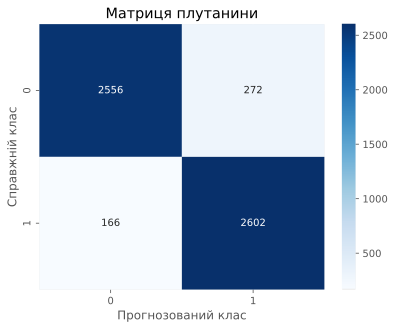

In [64]:
cm = confusion_matrix(y_test_rnn, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()